<a href="https://colab.research.google.com/github/akashkorupolu/gitt/blob/master/nn1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import numpy as np

In [128]:
df=pd.read_csv('/content/NN Project Data - Signal.csv')

In [129]:
df.columns

Index(['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11', 'Signal_Strength'],
      dtype='object')

In [130]:
df.shape

(1599, 12)

In [131]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [132]:
df.dtypes

,0
Parameter 1,float64
Parameter 2,float64
Parameter 3,float64
Parameter 4,float64
Parameter 5,float64
Parameter 6,float64
Parameter 7,float64
Parameter 8,float64
Parameter 9,float64
Parameter 10,float64


In [133]:
null=df.isnull().value_counts()
null.head()

,,,,,,,,,,,,count
Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength,
False,False,False,False,False,False,False,False,False,False,False,False,1599


In [134]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

,0
Parameter 1,0.0
Parameter 2,0.0
Parameter 3,0.0
Parameter 4,0.0
Parameter 5,0.0
Parameter 6,0.0
Parameter 7,0.0
Parameter 8,0.0
Parameter 9,0.0
Parameter 10,0.0


In [135]:
df.isna().sum()

,0
Parameter 1,0
Parameter 2,0
Parameter 3,0
Parameter 4,0
Parameter 5,0
Parameter 6,0
Parameter 7,0
Parameter 8,0
Parameter 9,0
Parameter 10,0


In [136]:

duplicate = df[df.duplicated()]
duplicate.value_counts()


Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  Parameter 11  Signal_Strength
6.7          0.460        0.24         1.7          0.077        18.0         34.0         0.99480      3.39         0.60          10.6          6                  3
7.5          0.510        0.02         1.7          0.084        13.0         31.0         0.99538      3.36         0.54          10.5          6                  3
7.2          0.695        0.13         2.0          0.076        12.0         20.0         0.99546      3.29         0.54          10.1          5                  3
             0.360        0.46         2.1          0.074        24.0         44.0         0.99534      3.40         0.85          11.0          7                  3
7.0          0.690        0.07         2.5          0.091        15.0         21.0         0.99572      3.38         0.60          11.3          6                  2
                                                                                                                                                                   ..
13.0         0.470        0.49         4.3          0.085        6.0          47.0         1.00210      3.30         0.68          12.7          6                  1
13.2         0.460        0.52         2.2          0.071        12.0         35.0         1.00060      3.10         0.56          9.0           6                  1
13.7         0.415        0.68         2.9          0.085        17.0         43.0         1.00140      3.06         0.80          10.0          6                  1
15.0         0.210        0.44         2.2          0.075        10.0         24.0         1.00005      3.07         0.84          9.2           7                  1
15.5         0.645        0.49         4.2          0.095        10.0         23.0         1.00315      2.92         0.74          11.1          5                  1
Name: count, Length: 220, dtype: int64

In [137]:
df.drop_duplicates(keep='first',inplace=True)

In [138]:
df.duplicated().sum()

np.int64(0)

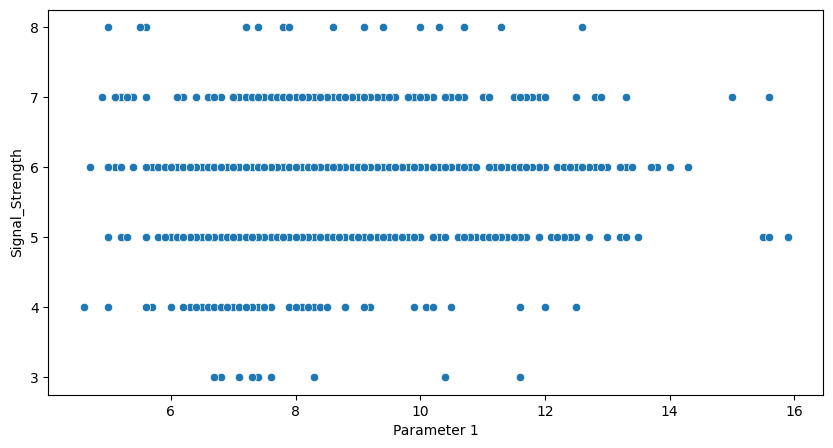

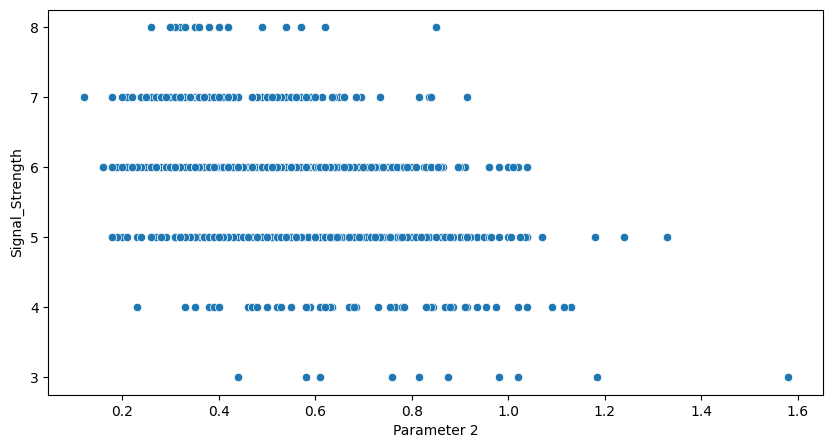

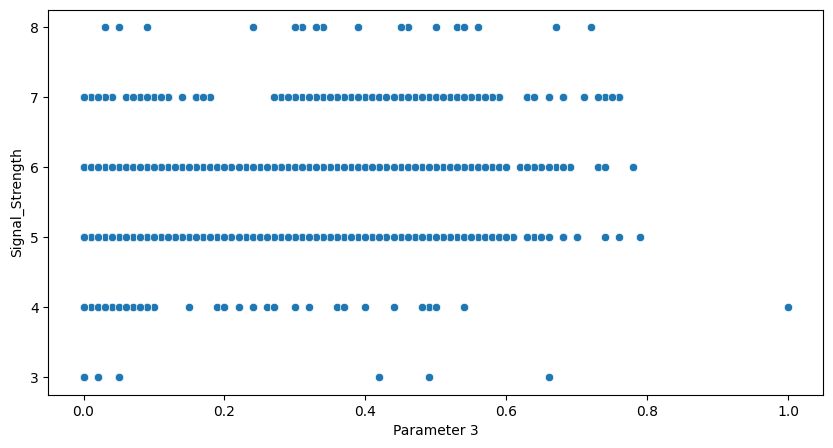

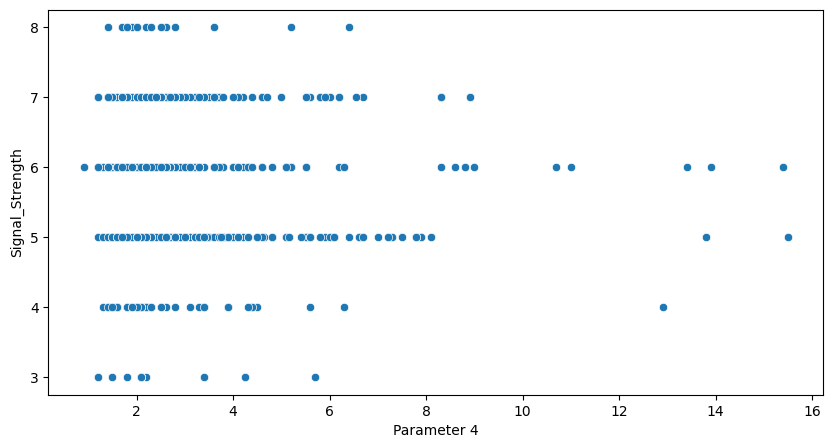

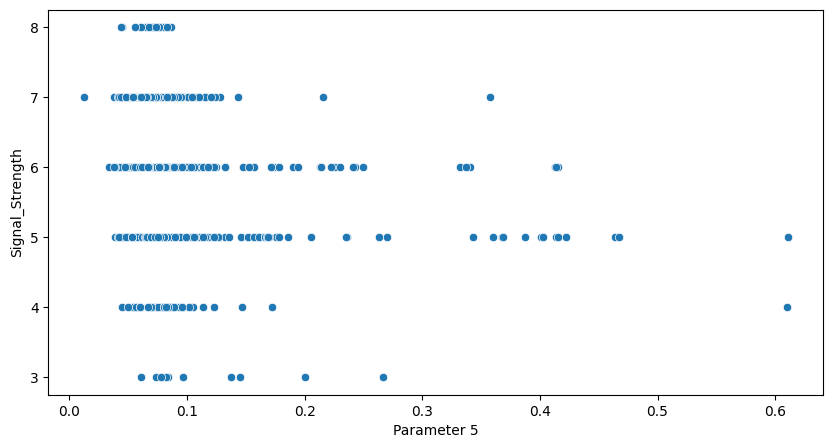

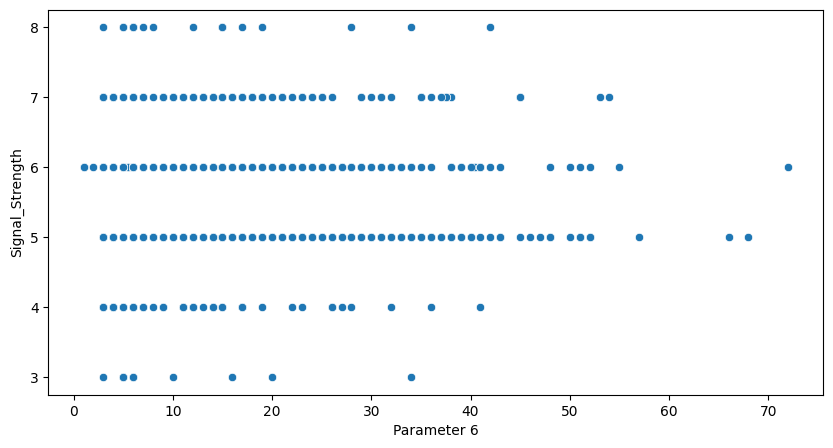

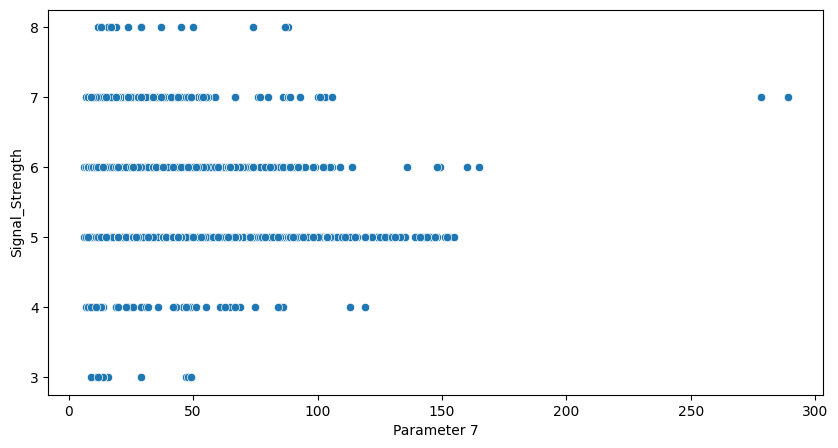

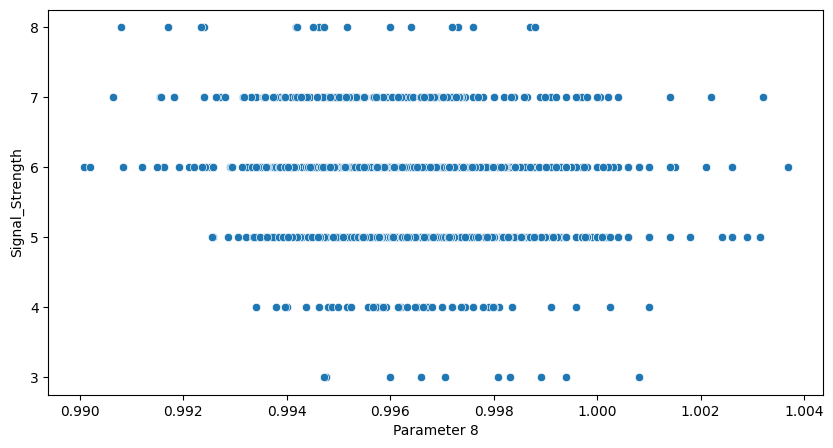

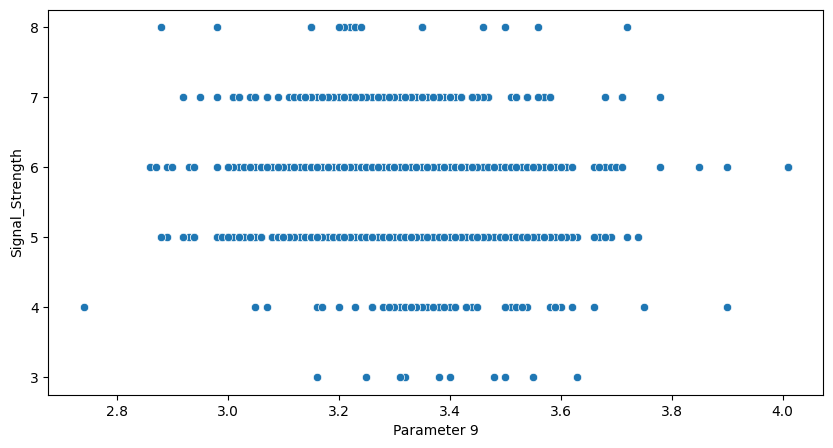

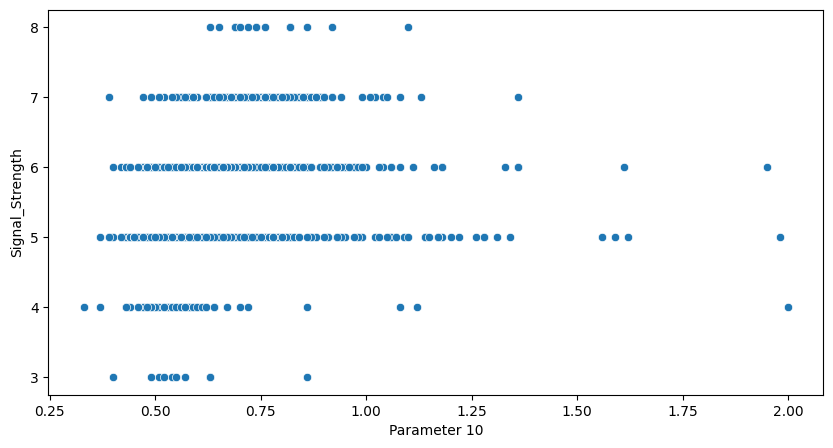

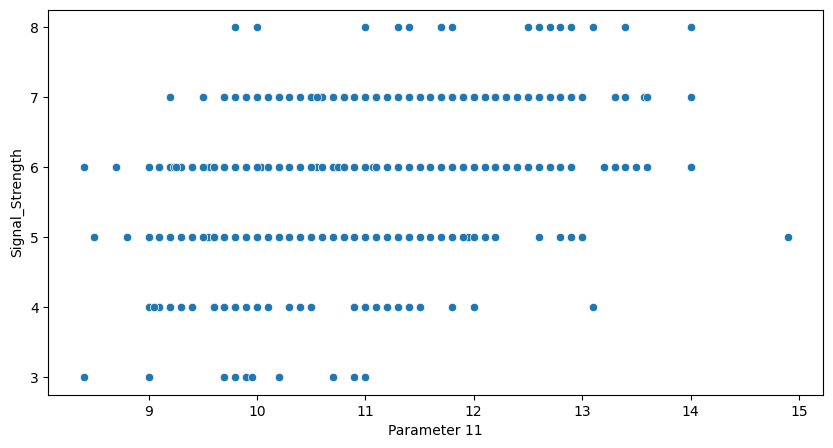

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.columns:
  if i!='Signal_Strength':
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=i,y='Signal_Strength',data=df)
    plt.xlabel(i)
    plt.ylabel('Signal_Strength')
    plt.show()

In [140]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Signal_Strength']=le.fit_transform(df['Signal_Strength'])

In [141]:
from sklearn.preprocessing import StandardScaler
df1=df.drop(['Signal_Strength'],axis=1)
sc=StandardScaler()
normalized_df=sc.fit_transform(df1)

In [142]:
df['Signal_Strength'].value_counts()

,count
Signal_Strength,
2,577
3,535
4,167
1,53
5,17
0,10


In [143]:
x=normalized_df
y=df['Signal_Strength']
from tensorflow.keras.utils import to_categorical
y=to_categorical(y,num_classes=6)

In [144]:
d=pd.DataFrame(y)
d.head()

,0,1,2,3,4,5
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [145]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [146]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
y_test.shape

(951, 11)
(408, 11)
(951, 6)


(408, 6)

In [147]:
d=pd.DataFrame(x_train)
d.head()

,0,1,2,3,4,5,6,7,8,9,10
0,3.276645,-0.653011,1.829832,0.944360,0.017755,-0.947324,0.005211,2.510962,-1.934366,0.886820,0.339924
1,0.512226,-0.379734,-0.216574,0.056665,0.058275,0.201725,0.903504,1.344081,-1.031019,-0.871638,-0.954374
2,2.412764,-0.379734,1.829832,-0.387183,-0.346922,-0.947324,-0.952969,1.119270,-2.063416,1.238511,-0.214775
3,-0.351655,-1.636812,0.499668,-0.535132,-0.853418,0.680495,0.394471,0.209317,0.646625,0.300667,1.541772
4,-0.754799,0.494756,-0.983977,-0.535132,-0.245623,-0.755816,-0.683481,0.584003,1.098298,-0.754407,-1.324174


In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [151]:
model=Sequential()
model.add(Dense(units=11,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(units=11,activation='relu'))
model.add(Dense(units=11,activation='relu'))
model.add(Dense(units=6,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [152]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=5,validation_data=(x_test,y_test))

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2033 - loss: 1.7727 - val_accuracy: 0.4387 - val_loss: 1.4247
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4441 - loss: 1.3804 - val_accuracy: 0.4730 - val_loss: 1.2257
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4648 - loss: 1.2413 - val_accuracy: 0.5343 - val_loss: 1.1304
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5067 - loss: 1.1404 - val_accuracy: 0.5760 - val_loss: 1.0514
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5387 - loss: 1.0584 - val_accuracy: 0.5882 - val_loss: 1.0107
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5483 - loss: 1.0541 - val_accuracy: 0.6029 - val_loss: 0.9842
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5743 - loss: 1.0217 - val_accuracy: 0.6078 - val_loss: 0.9603
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5686 - loss: 1.0171 - val_accuracy: 0.